In [15]:
# "conda python 3.10.14"
# -*- coding: utf-8 -*-
import matplotlib
# 设置字体参数
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

# 空气中二氧化硫的测定
## TOC

## 计算公式

$按式(1)将采样体积换算成标准采样体积:$
$$
\begin{align*}
V_{0}&=V\times\frac{293}{273+t}\times\frac{p}{101.3} \tag{1}
\\ \quad \\
&=0.5L/min \times 15min \times \frac{293}{273+25} \times \frac{100.7}{101.3} \\\quad\\
&=7.330483910505707 L
\end{align*}
$$
$\hspace{1cm}式中：$

$\hspace{2cm} V_0——标准采样体积，(L);\\$
$\hspace{2cm}V——采样体积，(L);\\$
$\hspace{2cm}t——采样点的温度，(^0C);\\$
$\hspace{2cm}p——采样点的大气压，(kPa)。$

$按公式(2)计算空气中二氧化硫的浓度:$
$$
C=\frac{10m}{V_{0}} \tag{2}
$$
$\hspace{1cm}式中：$

$\hspace{2cm}C——空气中SO_2的浓度，(mg/m^3); \\$
$\hspace{2cm}10——样品吸收液的总体积，(mL);\\$
$\hspace{2cm}m——测得的样品吸收液中二氧化硫的含量(减去样品空白),(μg);\\$
$\hspace{2cm}V_0——标准采样体积，(L)。$

In [2]:
0.5*15*(293/298)*(100.7/101.3)

7.330483910505707

## init data

并绘制表格

In [22]:
import numpy as np

# A -> B 二氧化硫含量 m (\mu g)
x_name = '二氧化硫含量 m ' + r'$(\mu g)$'
m_x_1 = np.array([0, 2, 4, 8, 12, 16])
# A -> B 吸光度 A
y_name = '吸光度 A'
A_y_1 = np.array([0.086, 0.143, 0.187, 0.211, 0.248, 0.289])
# A -> B 样品 吸光度 A
A_y_1s = 0.102
# B -> A 二氧化硫含量 m (\mu g)
m_x_2 = np.array([0, 2, 4, 8, 12, 16])
# B -> A 吸光度 A
A_y_2 = np.array([0.073, 0.106, 0.203, 0.270, 0.380, 0.485])
# print(A_y_2)
# B -> A 样品 吸光度 A
A_y_2s = 0.091

import pandas as pd
import re

def print_table(x_name, x, y_name, y, y_s):
    # 绘制table
    df = pd.DataFrame({x_name: x, y_name: y})
    new_row = pd.DataFrame({x_name: ['待预测'], y_name: [y_s]}, index=['样本'])
    df = pd.concat([df, new_row])
    # 打印数据框
    table_md = df.T.to_markdown().replace("|-", "|:").replace("-|", ":|")
    table_md = re.sub(r'(\d+\.\d+)', lambda x: '{:.3f}'.format(float(x.group())), table_md)
    print(table_md)
# print_table(x_name, m_x_1, y_name, A_y_1, A_y_1s)
# print_table(x_name, m_x_2, y_name, A_y_2, A_y_2s)

### 数据表格

A -> B 数据:

|                          |     0 |     1 |     2 |     3 |      4 |      5 | 样本   |
|:------------------------:|:-----:|:-----:|:-----:|:-----:|:------:|:------:|:------:|
| 二氧化硫含量 m $(\mu g)$ | 0     | 2     | 4     | 8     | 12     | 16     | 待预测 |
| 吸光度 A                 | 0.086 | 0.143 | 0.187 | 0.211 |  0.248 |  0.289 | 0.102  |

B -> A 数据:
|                          |     0 |     1 |     2 |    3 |     4 |      5 | 样本   |
|:------------------------:|:-----:|:-----:|:-----:|:----:|:-----:|:------:|:------:|
| 二氧化硫含量 m $(\mu g)$ | 0     | 2     | 4     | 8    | 12    | 16     | 待预测 |
| 吸光度 A                 | 0.073 | 0.106 | 0.203 | 0.270 |  0.380 |  0.485 | 0.091  |

## 计算回归方程

预测的二氧化硫含量 m $(\mu g)$为：-1.0404783808647622

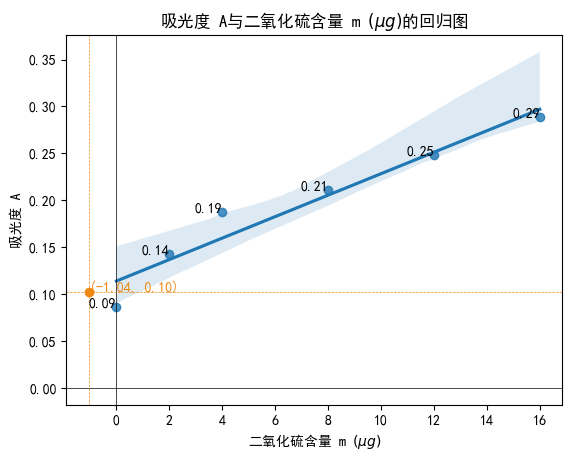

回归方程为：y = 0.011442105263157892x + 0.11390526315789469


In [68]:
# 计算回归方程 y = kx + b
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
from matplotlib.patches import ConnectionPatch

yellow = '#ee8916'

def regression(x, y, y_s):
    # 使用seaborn的regplot函数来绘制回归图
    sns.regplot(x=x, y=y)
    # 添加y=0和x=0的线
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    # 设置坐标轴的标签和图的标题
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title(f'{y_name}与{x_name}的回归图')    
    # 设置x轴的刻度
    plt.xticks(np.arange(min(x), max(x)+1, 2))
    # 标记每个点的纵坐标
    for i, txt in enumerate(y):
        plt.text(x[i], y[i], f'{txt:.2f}', ha='right')  # 保留两位小数
    # for i, txt in enumerate(y):
    #     plt.annotate(f'{txt:.2f}', (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center', arrowprops=dict(arrowstyle="->"))
      
    # 使用numpy的polyfit函数来拟合数据
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    # 使用拟合的模型来预测x_s
    x_s = (y_s - coefficients[1]) / coefficients[0]
    # 添加特殊的点
    plt.scatter(x_s, y_s, color=yellow)
    # 添加虚线的垂直线
    plt.axvline(x_s, color=yellow, linestyle='--',linewidth=0.5)
    plt.axhline(y_s, color=yellow, linestyle='--',linewidth=0.5)
    # 标记预测的点
    plt.text(x_s, y_s, f'({x_s:.2f}, {y_s:.2f})', color=yellow)
    
    result_str = f"预测的{x_name}为：{x_s}"
    display(Markdown(result_str))
    plt.show()
    print(f"回归方程为：y = {coefficients[0]}x + {coefficients[1]}")
    


regression(m_x_1, A_y_1, A_y_1s)

预测的二氧化硫含量 m $(\mu g)$为：0.7055612418969651

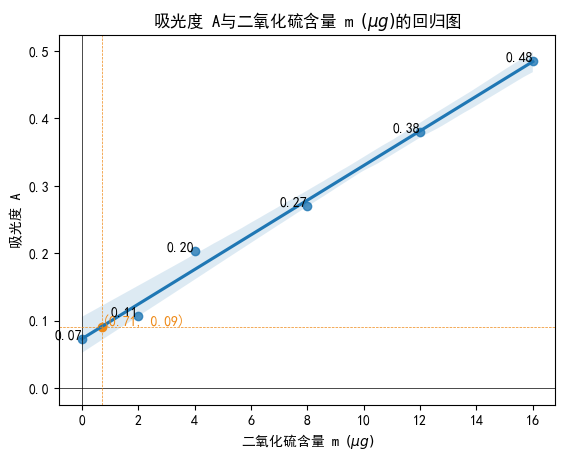

回归方程为：y = 0.025710526315789475x + 0.07285964912280697


In [58]:
regression(m_x_2, A_y_2, A_y_2s)

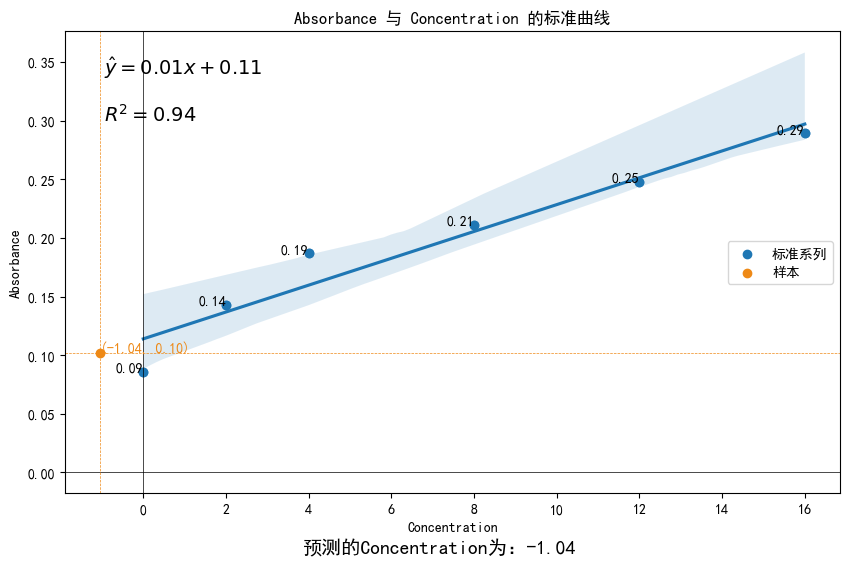

In [38]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

class StandardCurve:
    def __init__(self, x, y, x_label='x', y_label='y', y_s=None):
        self.x = np.array(x)
        self.y = np.array(y)
        self.x_label = x_label
        self.y_label = y_label
        self.y_s = y_s
        self.yellow = '#ee8916'
        self.title = f'{y_label} 与 {x_label} 的标准曲线'
        self.slope, self.intercept, self.r_value, self.p_value, self.std_err = stats.linregress(self.x, self.y)

    def plot_regression(self):
        plt.figure(figsize=(10, 6))  # 设置画布大小为 10x6 英寸
        sns.regplot(x=self.x, y=self.y)
        # 添加y=0和x=0的线
        plt.axhline(0, color='black',linewidth=0.5)
        plt.axvline(0, color='black',linewidth=0.5)
        # 设置x轴的刻度
        plt.xticks(np.arange(min(x), max(x)+1, 2))
        
        plt.xlabel(self.x_label)
        plt.ylabel(self.y_label)
        plt.title(self.title)
        plt.scatter(self.x, self.y, label='标准系列')  # 添加标签
        # 标记每个点的纵坐标
        for i, txt in enumerate(y):
            plt.text(x[i], y[i], f'{txt:.2f}', ha='right')  # 保留两位小数
        
        plt.text(0.05, 0.95, self.equation(), 
             transform=plt.gca().transAxes, fontsize=14, verticalalignment='top')
        # 添加 R² 值 (决定系数)
        plt.text(0.05, 0.85, f'$R^2 = {self.r_value**2:.2f}$', transform=plt.gca().transAxes, fontsize=14, verticalalignment='top')

        if self.y_s is not None:
            x_s = self.predict_x()
            # 添加特殊的点
            plt.scatter(x_s, self.y_s, color=self.yellow, label='样本')
            # 添加虚线的垂直线
            plt.axvline(x_s, color=self.yellow, linestyle='--',linewidth=0.5)
            plt.axhline(self.y_s, color=self.yellow, linestyle='--',linewidth=0.5)
            # 标记预测的点
            plt.text(x_s, self.y_s, f'({x_s:.2f}, {self.y_s:.2f})', color=self.yellow)
            plt.figtext(0.5, 0.01, f'预测的{self.x_label}为：{x_s:.2f}', fontsize=14, horizontalalignment='center')

        plt.legend()
        plt.show()
        
    def equation(self):
        return f'$\hat{{y}} = {self.slope:.2f}x + {self.intercept:.2f}$'

    def predict_x(self):
        return (self.y_s - self.intercept) / self.slope
    
x = [0, 2, 4, 8, 12, 16]
y = [0.086, 0.143, 0.187, 0.211, 0.248, 0.289]
y_s = A_y_1s
sc1 = StandardCurve(x, y, x_label='Concentration', y_label='Absorbance', y_s=y_s)
sc1.plot_regression()